In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
datasets=pd.read_csv("C://Users//basit//Downloads/Mall_Customers.csv")
datasets.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [4]:
datasets.shape

(200, 5)

In [5]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
datasets.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [68]:
x = datasets.iloc[:, :-2]
y = datasets.iloc[:, -2:]

In [69]:
y = y.values.reshape(-1, 2)

In [70]:
wcss=[]
for i in range (2,21):
    km=KMeans(n_clusters=i, init="k-means++",)
    km.fit(y)
    wcss.append(km.inertia_)  

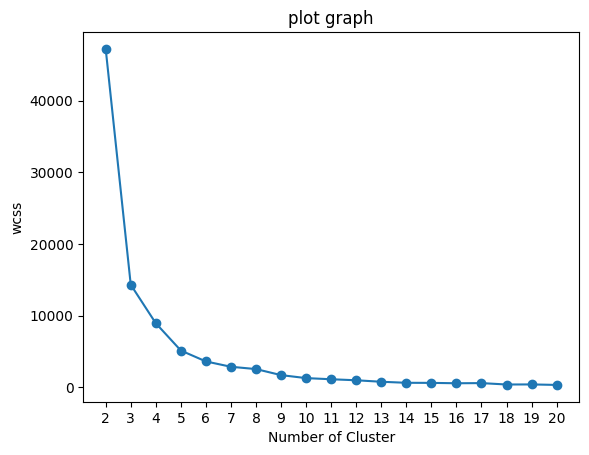

In [71]:
plt.plot(range(2,21),wcss,marker="o")
plt.title("plot graph")
plt.xlabel("Number of Cluster")
plt.xticks([i for i in range (2,21)])
plt.ylabel("wcss")
plt.savefig("plot")
plt.show()

In [72]:
km=KMeans(n_clusters=5,init="k-means++",random_state=0)

datasets["predict"]=km.fit_predict(y)



In [66]:
datasets

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),predict
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,4
197,198,Male,32,126,74,3
198,199,Male,32,137,18,2


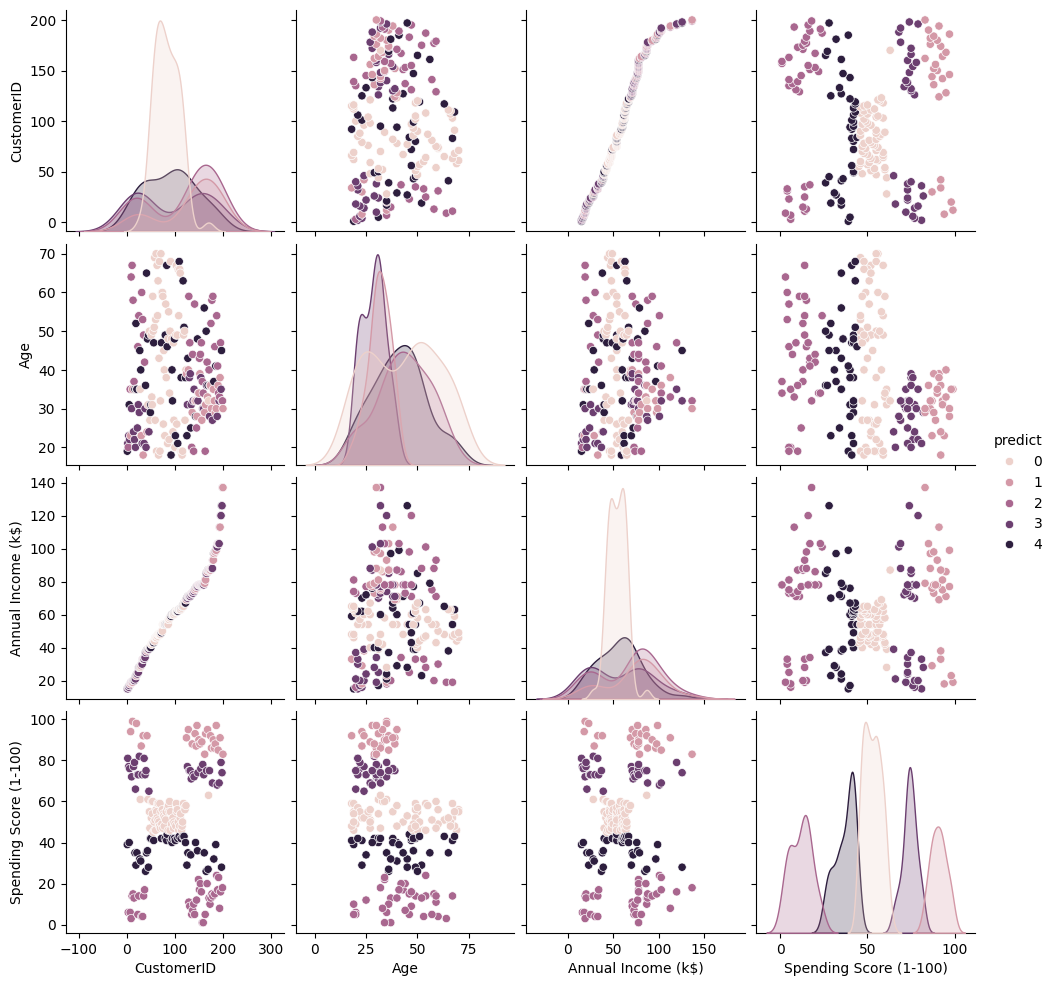

In [67]:
sns.pairplot(data=datasets,hue="predict")
plt.savefig("plot")
plt.show()